### Bước 1: Tải thư viện

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_palette('Set2')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from collections import Counter
from imblearn.combine import SMOTETomek
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict, cross_val_score, train_test_split, KFold, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, roc_auc_score, plot_roc_curve

import tensorflow
from tensorflow import keras
from keras import Sequential, initializers, utils
from keras.layers import Dense, Dropout
from keras.layers.recurrent import SimpleRNN
print('✔️ Libraries Imported!')

✔️ Libraries Imported!


### Bước 2: Tải dữ liệu

In [2]:
df = pd.read_csv('Data/Bank_Customer_Churn.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### Bước 3: Xóa thuộc tính không quan trọng

In [8]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [5]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### Bước 4: Mã hóa (chuyển text sang code)

In [10]:
le = LabelEncoder()
a = ['Geography','Gender']
for i in a:
    df[i] = le.fit_transform(df[i])
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


Hệ số tương quan: 
Exited             1.000000
Age                0.285323
Balance            0.118533
Geography          0.035943
EstimatedSalary    0.012097
HasCrCard         -0.007138
Tenure            -0.014001
CreditScore       -0.027094
NumOfProducts     -0.047820
Gender            -0.106512
IsActiveMember    -0.156128
Name: Exited, dtype: float64


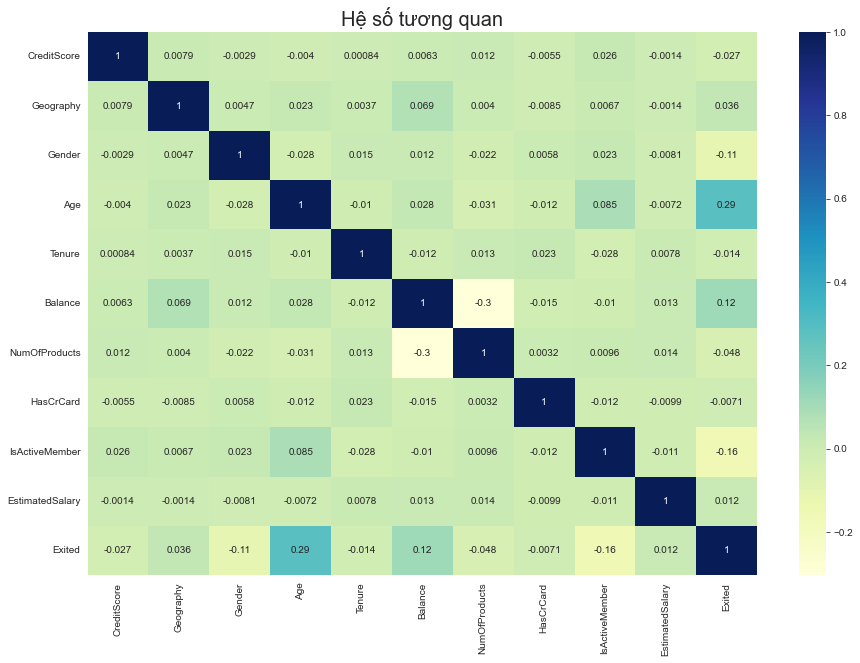

In [79]:
corrmat = df.corr()
print(f"Hệ số tương quan: \n{corrmat.sort_values(by = ['Exited'], ascending=False).iloc[0].sort_values(ascending=False)}")

plt.figure(figsize = (15,10))
sns.heatmap(corrmat,  cmap="YlGnBu", annot = True)
plt.title('Hệ số tương quan', fontsize = 20)
plt.show()

### Bước 5: Xử lý mất cân bằng

In [11]:
print(f'Exited count value:\n{df.Exited.value_counts()}')
print(f'Tỷ lệ khách hàng rời bỏ trong tập dữ liệu: {round((2037/len(df))*100,4)} %')

Exited count value:
0    7963
1    2037
Name: Exited, dtype: int64
Tỷ lệ khách hàng rời bỏ trong tập dữ liệu: 20.37 %


In [38]:
X = df.drop(['Exited'], axis= 1)
X = StandardScaler().fit_transform(X)
y = df.Exited

In [13]:
# Lưu dữ liệu X sau khi chuẩn hóa thành Excel để viết lên word
S = pd.DataFrame(X)
S['Exited'] = y
S.to_excel('Data/Data_Standardization.xlsx', index= False)

In [39]:
smk = SMOTETomek(random_state= 42)
print(f'Số mẫu trước khi làm sạch: {Counter(y)}')
X, y = smk.fit_resample(X, y)
print(f'Số mẫu sau khi làm sạch: {Counter(y)}')

Số mẫu trước khi làm sạch: Counter({0: 7963, 1: 2037})
Số mẫu sau khi làm sạch: Counter({1: 7846, 0: 7846})


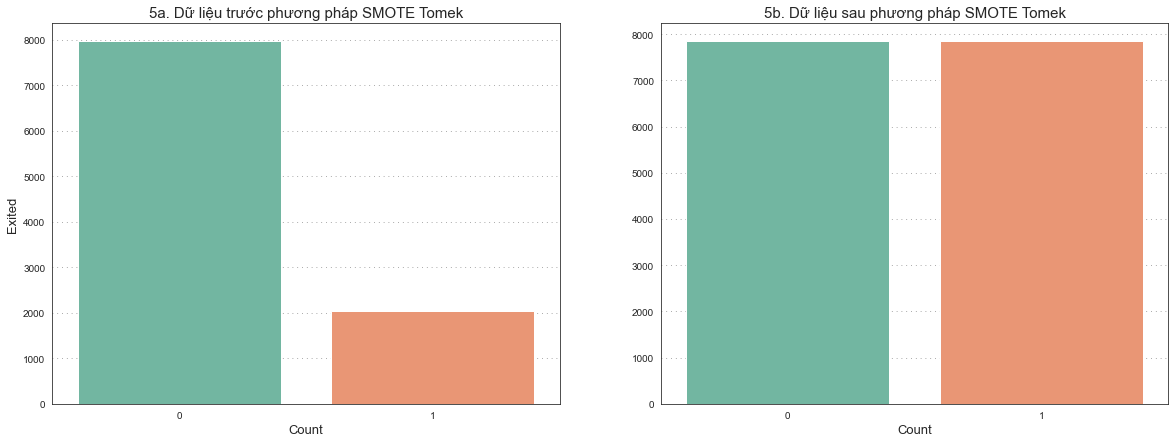

In [14]:
fig = plt.figure(figsize=(20,7))
gs = fig.add_gridspec(1 ,2)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])

sns.countplot(data= df, x = 'Exited', ax = ax0)
ax0.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax0.set_title('5a. Dữ liệu trước phương pháp SMOTE Tomek', fontsize= 15)
ax0.set_xlabel("Count", fontsize= 13)
ax0.set_ylabel("Exited", fontsize= 13)

sns.countplot(data= df, x = y, ax = ax1)
ax1.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax1.set_title('5b. Dữ liệu sau phương pháp SMOTE Tomek', fontsize= 15)
ax1.set_xlabel("Count", fontsize= 13)
ax1.set_ylabel("")

plt.show()

### Bước 5: Xây dựng tập dữ liệu huấn luyện và kiểm

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [75]:
f1 = pd.DataFrame(X_train)
f1.to_csv('Data/DataTrainTest/X_train.csv', index= False)
f2 = pd.DataFrame(X_test)
f2.to_excel('Data/DataTrainTest/X_test.xlsx', index= False)

y_train.to_csv('Data/DataTrainTest/y_train.csv', index= False)
y_test.to_excel('Data/DataTrainTest/y_test.xlsx', index= False)

### Bước 6: xây dựng mô hình K láng giềng gần nhất (KNN)

In [32]:
kf = KFold(n_splits= 5, shuffle= False).split(range(25))

k_range = list(range(3, 15, 2))
k_scoses = []
for k in k_range:
    knn_ = KNeighborsClassifier(n_neighbors= k)
    scose = cross_val_score(knn_, X, y, cv= 5, scoring= 'accuracy')
    k_scoses.append(scose.mean())

In [33]:
d = {"K": k_range, "Accuracy": k_scoses}
f = pd.DataFrame(d)
f.sort_values(by=['Accuracy'], ascending= False)

,K,Accuracy
0,3,0.877136
1,5,0.862033
2,7,0.850563
3,9,0.840303
4,11,0.835523
5,13,0.830743


In [26]:
knn = KNeighborsClassifier(n_neighbors = 3).fit(X_train, y_train)
yid_pred_knn = knn.predict(X_test)
print(classification_report(y_test, yid_pred_knn))
print(f"Accuracy  {round(accuracy_score(y_test, yid_pred_knn),5)}")
print(f"Recall    {round(recall_score(y_test, yid_pred_knn),5)}")
print(f"Precision {round(precision_score(y_test, yid_pred_knn),5)}")
print(f"F1-score  {round(f1_score(y_test, yid_pred_knn),5)}")

              precision    recall  f1-score   support

           0       0.95      0.79      0.86      1513
           1       0.83      0.96      0.89      1626

    accuracy                           0.88      3139
   macro avg       0.89      0.87      0.87      3139
weighted avg       0.88      0.88      0.87      3139

Accuracy  0.87512
Recall    0.95818
Precision 0.82784
F1-score  0.88826


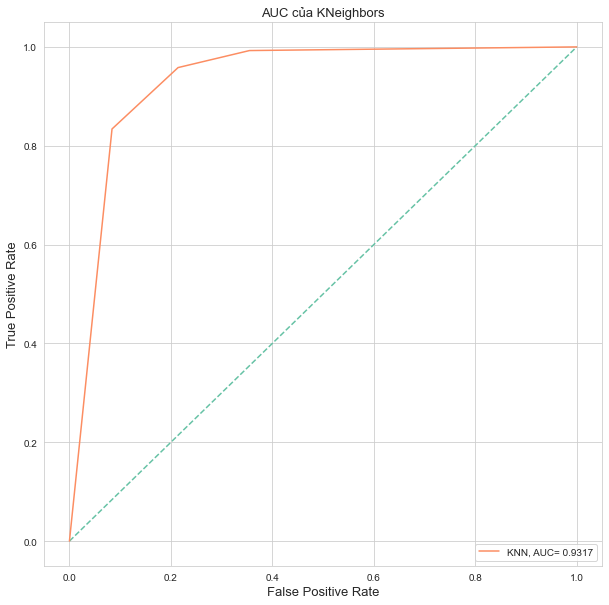

In [34]:
y_pred_knn = knn.predict_proba(X_test)[::,1]
fpr_knn, tpr_knn, _ = roc_curve(y_test,  y_pred_knn)
auc_knn = roc_auc_score(y_test, y_pred_knn)

plt.figure(figsize=(10,10))

sns.lineplot(x = [0, 1], y= [0, 1], linestyle='--')
plt.plot(fpr_knn, tpr_knn, label= f"KNN, AUC= {round(auc_knn, 4)}")

plt.title('AUC của KNeighbors', fontsize = '13')
plt.ylabel('True Positive Rate', fontsize = '13')
plt.xlabel('False Positive Rate', fontsize = '13')
plt.legend(loc=4)
plt.show()

### Bước 7: Xây dụng mô hình Rừng ngẫu nhiên (Random Forest)


In [ ]:
'''
param_grid = {'n_estimators': [100, 300, 500, 800, 1000, 1300],
                'criterion': ['gini', 'entropy'],}

grid_RF = GridSearchCV(RandomForestClassifier(random_state = 32),param_grid, scoring= 'recall', cv=5)
grid_RF.fit(X_train, y_train)
print(f'Best_parameters: {grid_RF.best_estimator_}')
print(f'Best_result (Recall): {grid_RF.best_score_}')

grid_predictions = grid_RF.predict(X_test)
print(classification_report(y_test, grid_predictions))
'''

In [32]:
rdf = RandomForestClassifier(criterion='entropy', n_estimators=1000, random_state=32, bootstrap = True)
rdf.fit(X_train, y_train)
yid_pred_rdf = rdf.predict(X_test)
print(classification_report(y_test, yid_pred_rdf))
print(f"Accuracy  {round(accuracy_score(y_test, yid_pred_rdf),5)}")
print(f"Recall    {round(recall_score(y_test, yid_pred_rdf),5)}")
print(f"Precision {round(precision_score(y_test, yid_pred_rdf),5)}")
print(f"F1-score  {round(f1_score(y_test, yid_pred_rdf),5)}")

              precision    recall  f1-score   support

           0       0.90      0.91      0.91      1513
           1       0.92      0.91      0.91      1626

    accuracy                           0.91      3139
   macro avg       0.91      0.91      0.91      3139
weighted avg       0.91      0.91      0.91      3139

Accuracy  0.90921
Recall    0.90775
Precision 0.9162
F1-score  0.91196


### Bước 8: Xây dụng mô hình XGBoot

In [ ]:
'''
param_grid = {"n_estimators":[60, 100, 200, 500, 1000, 1500],'reg_lambda':[2,1],'gamma':[0,0.3,0.2,0.1],
                'eta':[0.06,0.05,0.04],
                'max_depth':[3,5],
                'objective':['binary:logistic']}

grid_XGBCl = GridSearchCV(XGBClassifier(), param_grid, scoring= 'recall', cv= 5)
grid_XGBCl.fit(X_train, y_train)

print(f'Best_parameters: {grid_XGBCl.best_params_}')
print(f'Best_result (Recall): {grid_XGBCl.best_score_}')

grid_predictions = grid_XGBCl.predict(X_test)
print(classification_report(y_test, grid_predictions))
'''

In [36]:
xgb = XGBClassifier(eta= 0.06, gamma= 0, max_depth = 5, n_estimators = 1000, objective = 'binary:logistic', reg_lambda = 2)
xgb.fit(X_train, y_train)
yid_pred_xgb = xgb.predict(X_test)
print(classification_report(y_test, yid_pred_xgb))
print(f"Accuracy  {round(accuracy_score(y_test, yid_pred_xgb),5)}")
print(f"Recall    {round(recall_score(y_test, yid_pred_xgb),5)}")
print(f"Precision {round(precision_score(y_test, yid_pred_xgb),5)}")
print(f"F1-score  {round(f1_score(y_test, yid_pred_xgb),5)}")

              precision    recall  f1-score   support

           0       0.87      0.94      0.91      1513
           1       0.94      0.87      0.91      1626

    accuracy                           0.91      3139
   macro avg       0.91      0.91      0.91      3139
weighted avg       0.91      0.91      0.91      3139

Accuracy  0.90507
Recall    0.87331
Precision 0.93915
F1-score  0.90504


### Bước 9: Xây dụng mô hình Máy hỗ trợ Vector (Support Vector Machine)

In [ ]:
'''
param_grid = {'C': [0.1, 1, 10, 100, 1000],
                'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                'kernel': ['rbf']}

grid_SVM = GridSearchCV(SVC(), param_grid, scoring= 'recall', cv= 5)
grid_SVM.fit(X_train, y_train)

print(f'Best_parameters: {grid_SVM.best_params_}')
print(f'Best_result (Recall): {grid_SVM.best_score_}')

grid_predictions = grid_SVM.predict(X_test)
print(classification_report(y_test, grid_predictions))
'''

In [40]:
svm = SVC(C= 10, gamma = 1, kernel = 'rbf', probability=True) # c = 10
svm.fit(X_train, y_train)
yid_pred_svm = svm.predict(X_test)
print(classification_report(y_test, yid_pred_svm))
print(f"Accuracy  {round(accuracy_score(y_test, yid_pred_svm),5)}")
print(f"Recall    {round(recall_score(y_test, yid_pred_svm),5)}")
print(f"Precision {round(precision_score(y_test, yid_pred_svm),5)}")
print(f"F1-score  {round(f1_score(y_test, yid_pred_svm),5)}")

              precision    recall  f1-score   support

           0       0.96      0.89      0.92      1513
           1       0.91      0.96      0.93      1626

    accuracy                           0.93      3139
   macro avg       0.93      0.93      0.93      3139
weighted avg       0.93      0.93      0.93      3139

Accuracy  0.92864
Recall    0.9631
Precision 0.9052
F1-score  0.93325


***
### Bước 10: Xây dụng mô hình Stacking - Hồi quy Logicstic

In [44]:
%%time
estimators = [
                ('knn', KNeighborsClassifier(n_neighbors = 3)),
                ('rdf', RandomForestClassifier(criterion='entropy', n_estimators=1000, random_state=32, bootstrap = True)),
                ('svm', SVC(C= 10, gamma = 1, kernel = 'rbf')),
                ('xgb', XGBClassifier(eta= 0.06, gamma= 0, max_depth = 5, n_estimators = 1000, objective = 'binary:logistic', reg_lambda = 2))
            ]
slr = StackingClassifier(
                        estimators = estimators,
                        final_estimator = LogisticRegression(C = 2, max_iter = 100000, multi_class = 'ovr', solver = 'liblinear'),
                        cv = 5)
slr.fit(X_train, y_train)
yid_pred_slr = slr.predict(X_test)

print(classification_report(y_test, yid_pred_slr))
print(f"Accuracy  {round(accuracy_score(y_test, yid_pred_slr),5)}")
print(f"Recall    {round(recall_score(y_test, yid_pred_slr),5)}")
print(f"Precision {round(precision_score(y_test, yid_pred_slr),5)}")
print(f"F1-score  {round(f1_score(y_test, yid_pred_slr),5)}")

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1513
           1       0.95      0.96      0.96      1626

    accuracy                           0.95      3139
   macro avg       0.95      0.95      0.95      3139
weighted avg       0.95      0.95      0.95      3139

Accuracy  0.95349
Recall    0.95572
Precision 0.95455
F1-score  0.95513
CPU times: total: 7min 34s
Wall time: 2min 56s


***

### Bước 10: Xây dụng mô hình Deep Neural Network

In [51]:
%%time
initializer = keras.initializers.Identity()
Model_DNN = Sequential(
    [
        Dense(X_train.shape[1], activation= 'relu', input_dim = X_train.shape[1], kernel_initializer= initializer),
        Dense(128, activation = 'relu'),
        Dropout(rate = 0.1),
        Dense(64, activation = 'relu'),
        Dropout(rate = 0.1),
        Dense(32, activation = 'relu'),
        Dropout(rate = 0.1),
        Dense(16, activation = 'relu'),
        Dropout(rate = 0.1),
        Dense(8, activation = 'relu'),
        Dropout(rate = 0.1),
        Dense(1, activation='sigmoid')
    ]
)
Model_DNN.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 10)                110       
                                                                 
 dense_18 (Dense)            (None, 128)               1408      
                                                                 
 dropout_25 (Dropout)        (None, 128)               0         
                                                                 
 dense_19 (Dense)            (None, 64)                8256      
                                                                 
 dropout_26 (Dropout)        (None, 64)                0         
                                                                 
 dense_20 (Dense)            (None, 32)                2080      
                                                                 
 dropout_27 (Dropout)        (None, 32)               

In [56]:
%%time
Model_DNN.compile(loss='binary_crossentropy',
                optimizer = 'RMSProp',
                metrics = ['binary_accuracy'])
history = Model_DNN.fit(X_train, y_train,
            epochs = 100,
            batch_size = 32,
            validation_split= 0.2)
yid_pred_dnn = Model_DNN.predict(X_test)
yid_pred_dnn =(yid_pred_dnn > 0.5)

print(confusion_matrix(y_test, yid_pred_dnn))
print(classification_report(y_test, yid_pred_dnn))
print(f"Accuracy :{round(accuracy_score(y_test, yid_pred_dnn),5)}")
print(f"Recall   :{round(recall_score(y_test, yid_pred_dnn),5)}")
print(f"Precision:{round(precision_score(y_test, yid_pred_dnn),5)}")
print(f"F1-score :{round(f1_score(y_test, yid_pred_dnn),5)}")

Epoch 1/100
314/314 [==============================] - 2s 3ms/step - loss: 0.3405 - binary_accuracy: 0.8637 - val_loss: 0.3734 - val_binary_accuracy: 0.8399
Epoch 2/100
314/314 [==============================] - 1s 3ms/step - loss: 0.3456 - binary_accuracy: 0.8622 - val_loss: 0.3748 - val_binary_accuracy: 0.8447
Epoch 3/100
314/314 [==============================] - 1s 2ms/step - loss: 0.3378 - binary_accuracy: 0.8686 - val_loss: 0.3646 - val_binary_accuracy: 0.8427
Epoch 4/100
314/314 [==============================] - 1s 3ms/step - loss: 0.3424 - binary_accuracy: 0.8639 - val_loss: 0.3835 - val_binary_accuracy: 0.8359
Epoch 5/100
314/314 [==============================] - 1s 2ms/step - loss: 0.3432 - binary_accuracy: 0.8644 - val_loss: 0.3695 - val_binary_accuracy: 0.8459
Epoch 6/100
314/314 [==============================] - 1s 3ms/step - loss: 0.3356 - binary_accuracy: 0.8642 - val_loss: 0.3828 - val_binary_accuracy: 0.8423
Epoch 7/100
314/314 [==============================] - 1s 

***

### Bước 11: Xây dụng mô hình Stacking - DNN

In [61]:
%%time
class StackingDNN():
    def __init__(self, X_train= None, y_train= None, X_test= None, y_test= None):
        self.X_train = X_train
        self.y_train = y_train
        self.X_test= X_test
        self.y_test= y_test
    def Print_pred_lv1(self, X_train, y_train):
        knn = KNeighborsClassifier(n_neighbors = 3).fit(X_train, y_train)
        rdf = RandomForestClassifier(criterion='entropy', n_estimators=1000, random_state=32, bootstrap = True).fit(X_train, y_train)
        svm =SVC(C= 10,gamma = 1, kernel = 'rbf').fit(X_train, y_train)
        xgb = XGBClassifier(eta= 0.06, gamma= 0, max_depth = 5, n_estimators = 1000, objective = 'binary:logistic', reg_lambda = 2).fit(X_train, y_train)

        predicted_knn = cross_val_predict(knn, X_train, y_train, cv= 5)
        predicted_rdf = cross_val_predict(rdf, X_train, y_train, cv= 5)
        predicted_svm = cross_val_predict(svm, X_train, y_train, cv= 5)
        predicted_xgb = cross_val_predict(xgb, X_train, y_train, cv= 5)
        d = {'KNN' : predicted_knn, 'RDF': predicted_rdf, 'SVM': predicted_svm, 'XGB' : predicted_xgb}
            # Create Dataframe predictions Level 1
        predicted_level1 = pd.DataFrame(d)

        return print(predicted_level1)

    def Final_Prediction(self, X_train, y_train, X_test, y_test):
        # Huấn luyện mô hình Level 1
        knn = KNeighborsClassifier(n_neighbors = 3).fit(X_train, y_train)
        rdf = RandomForestClassifier(criterion='entropy', n_estimators=1000, random_state=32, bootstrap = True).fit(X_train, y_train)
        svm =SVC(C= 10,gamma = 1, kernel = 'rbf').fit(X_train, y_train)
        xgb = XGBClassifier(eta= 0.06, gamma= 0, max_depth = 5, n_estimators = 1000, objective = 'binary:logistic', reg_lambda = 2).fit(X_train, y_train)

        # Đưa ra kết quả Level 1
        predicted_knn = cross_val_predict(knn, X_train, y_train, cv= 5)
        predicted_rdf = cross_val_predict(rdf, X_train, y_train, cv= 5)
        predicted_svm = cross_val_predict(svm, X_train, y_train, cv= 5)
        predicted_xgb = cross_val_predict(xgb, X_train, y_train, cv= 5)
        d = {'KNN' : predicted_knn, 'RDF': predicted_rdf, 'SVM': predicted_svm, 'XGB' : predicted_xgb}
            # Create Dataframe predictions Level 1
        predicted_level1 = pd.DataFrame(d)

        # Xây dựng mô hình Meta Level 2
        initializer = keras.initializers.Identity()
        Meta_Model = Sequential([
                Dense(predicted_level1.shape[1], activation= 'relu', input_dim = predicted_level1.shape[1], kernel_initializer= initializer),
                Dense(128, activation = 'relu'),
                Dropout(rate = 0.1),
                Dense(64, activation = 'relu'),
                Dropout(rate = 0.1),
                Dense(32, activation = 'relu'),
                Dropout(rate = 0.1),
                Dense(16, activation = 'relu'),
                Dropout(rate = 0.1),
                Dense(8, activation = 'relu'),
                Dropout(rate = 0.1),
                Dense(1, activation='sigmoid')
            ]
        )
        Meta_Model.compile(loss='binary_crossentropy',
                                optimizer = 'RMSProp',
                                metrics = ['binary_accuracy']
                            )
        # Huấn luyện mô hình Meta Level 2
        Meta_Model.fit(predicted_level1, y_train,
                            epochs = 100,
                            batch_size = 7,
                            validation_split= 0.2)

        # Đưa ra kết quả level 1 - Test
        pred_test_knn = knn.predict(X_test)
        pred_test_rdf = rdf.predict(X_test)
        pred_test_svm = svm.predict(X_test)
        pred_test_xgb = xgb.predict(X_test)
        d_2 = {'KNN_2' : pred_test_knn, 'RDF_2': pred_test_rdf, 'SVM_2': pred_test_svm, 'XGB_2' : pred_test_xgb}
            # Create Dataframe prediction
        predicted_test = pd.DataFrame(d_2)

        y_final = Meta_Model.predict(predicted_test)
        y_final =(y_final > 0.5)

        # Chỉ số đánh giá mô hình
        matrix = confusion_matrix(y_test, y_final)
        report = classification_report(y_test, y_final)
        accuracy = round(accuracy_score(y_test, y_final),5)
        recall = round(recall_score(y_test, y_final),5)
        precision = round(precision_score(y_test, y_final),5)
        f1 = round(f1_score(y_test, y_final),5)

        return print(f"Confusion matrix\n{matrix}",
                        f"\nClassification_report\n{report}",
                        f"\nAccuracy {accuracy}",
                        f"\nRecall {recall}",
                        f"\nPrecision {precision}",
                        f"\nF1_score {f1}")

CPU times: total: 0 ns
Wall time: 1 ms


In [62]:
%%time
Mdelll = StackingDNN()
Mdelll.Final_Prediction(X_train, y_train, X_test, y_test)

Epoch 1/100
1435/1435 [==============================] - 4s 2ms/step - loss: 0.2510 - binary_accuracy: 0.9147 - val_loss: 0.2512 - val_binary_accuracy: 0.9319
Epoch 2/100
1435/1435 [==============================] - 4s 3ms/step - loss: 0.2306 - binary_accuracy: 0.9216 - val_loss: 0.1980 - val_binary_accuracy: 0.9267
Epoch 3/100
1435/1435 [==============================] - 3s 2ms/step - loss: 0.2357 - binary_accuracy: 0.9243 - val_loss: 0.1931 - val_binary_accuracy: 0.9291
Epoch 4/100
1435/1435 [==============================] - 3s 2ms/step - loss: 0.2340 - binary_accuracy: 0.9219 - val_loss: 0.1974 - val_binary_accuracy: 0.9307
Epoch 5/100
1435/1435 [==============================] - 3s 2ms/step - loss: 0.2326 - binary_accuracy: 0.9195 - val_loss: 0.1886 - val_binary_accuracy: 0.9259
Epoch 6/100
1435/1435 [==============================] - 3s 2ms/step - loss: 0.2386 - binary_accuracy: 0.9179 - val_loss: 0.1879 - val_binary_accuracy: 0.9323
Epoch 7/100
1435/1435 [=======================

***

### Bước 12: Xây dụng mô hình Deep Neural Network

In [63]:
%%time
Model_RNN = Sequential(
                [
            SimpleRNN(units = 50, activation='relu', return_sequences=True, input_shape= (X_train.shape[1],1)),
            Dropout(0.2),
            SimpleRNN(units = 50, activation='relu', return_sequences=True),
            Dropout(0.2),
            SimpleRNN(units = 50, activation='relu', return_sequences=True),
            Dropout(0.2),
            SimpleRNN(units = 50, activation='relu', return_sequences=True),
            Dropout(0.2),
            SimpleRNN(units = 50),
            Dropout(0.2),
            Dense(units = 1, activation='sigmoid'),
                    ]
                )
Model_RNN.compile(loss= 'binary_crossentropy',
                                optimizer = 'RMSProp',
                                metrics = ['binary_accuracy'])
Model_RNN.fit(X_train, y_train,
                    epochs= 100,
                    batch_size= 32,
                    validation_split= 0.2)
yid_pred_rnn = Model_RNN.predict(X_test)
yid_pred_rnn = (yid_pred_rnn > 0.5)

print(confusion_matrix(y_test, yid_pred_rnn))
print(classification_report(y_test, yid_pred_rnn))
print(f"Accuracy :{round(accuracy_score(y_test, yid_pred_rnn),5)}")
print(f"Recall   :{round(recall_score(y_test, yid_pred_rnn),5)}")
print(f"Precision:{round(precision_score(y_test, yid_pred_rnn),5)}")
print(f"F1-score :{round(f1_score(y_test, yid_pred_rnn),5)}")

Epoch 1/100
314/314 [==============================] - 8s 14ms/step - loss: 0.5514 - binary_accuracy: 0.7183 - val_loss: 0.4619 - val_binary_accuracy: 0.7742
Epoch 2/100
314/314 [==============================] - 4s 13ms/step - loss: 0.4915 - binary_accuracy: 0.7646 - val_loss: 0.4434 - val_binary_accuracy: 0.7869
Epoch 3/100
314/314 [==============================] - 4s 13ms/step - loss: 0.4804 - binary_accuracy: 0.7681 - val_loss: 0.4326 - val_binary_accuracy: 0.7929
Epoch 4/100
314/314 [==============================] - 4s 13ms/step - loss: 0.4658 - binary_accuracy: 0.7815 - val_loss: 0.4283 - val_binary_accuracy: 0.7909
Epoch 5/100
314/314 [==============================] - 4s 12ms/step - loss: 0.4621 - binary_accuracy: 0.7778 - val_loss: 0.4241 - val_binary_accuracy: 0.7997
Epoch 6/100
314/314 [==============================] - 4s 12ms/step - loss: 0.4557 - binary_accuracy: 0.7840 - val_loss: 0.4211 - val_binary_accuracy: 0.8057
Epoch 7/100
314/314 [==============================]

### Bước 12: Xây dụng mô hình Stacking - RNN

In [19]:
%%time
class Stacking_RNN():
    def __init__(self, X_train= None, y_train= None, X_test= None, y_test= None):
        self.X_train = X_train
        self.y_train = y_train
        self.X_test= X_test
        self.y_test= y_test
    def Print_pred_lv1(self, X_train, y_train):
        knn = KNeighborsClassifier(n_neighbors = 3).fit(X_train, y_train)
        rdf = RandomForestClassifier(criterion='entropy', n_estimators=1000, random_state=32, bootstrap = True).fit(X_train, y_train)
        svm =SVC(C= 10,gamma = 1, kernel = 'rbf').fit(X_train, y_train)
        xgb = XGBClassifier(eta= 0.06, gamma= 0, max_depth = 5, n_estimators = 1000, objective = 'binary:logistic', reg_lambda = 2).fit(X_train, y_train)

        predicted_knn = cross_val_predict(knn, X_train, y_train, cv= 5)
        predicted_rdf = cross_val_predict(rdf, X_train, y_train, cv= 5)
        predicted_svm = cross_val_predict(svm, X_train, y_train, cv= 5)
        predicted_xgb = cross_val_predict(xgb, X_train, y_train, cv= 5)
        d = {'KNN' : predicted_knn, 'RDF': predicted_rdf, 'SVM': predicted_svm, 'XGB' : predicted_xgb}
            # Create Dataframe predictions Level 1
        predicted_level1 = pd.DataFrame(d)
        predicted_level1.to_excel('Data/Pred_1.xlsx')
        return print(predicted_level1)

    def Final_Prediction(self, X_train, y_train, X_test, y_test):
        # Huấn luyện mô hình Level 1
        knn = KNeighborsClassifier(n_neighbors = 3).fit(X_train, y_train)
        rdf = RandomForestClassifier(criterion='entropy', n_estimators=1000, random_state=32, bootstrap = True).fit(X_train, y_train)
        svm =SVC(C= 10,gamma = 1, kernel = 'rbf').fit(X_train, y_train)
        xgb = XGBClassifier(eta= 0.06, gamma= 0, max_depth = 5, n_estimators = 1000, objective = 'binary:logistic', reg_lambda = 2).fit(X_train, y_train)

        # Đưa ra kết quả Level 1
        predicted_knn = cross_val_predict(knn, X_train, y_train, cv= 5)
        predicted_rdf = cross_val_predict(rdf, X_train, y_train, cv= 5)
        predicted_svm = cross_val_predict(svm, X_train, y_train, cv= 5)
        predicted_xgb = cross_val_predict(xgb, X_train, y_train, cv= 5)
        d = {'KNN' : predicted_knn, 'RDF': predicted_rdf, 'SVM': predicted_svm, 'XGB' : predicted_xgb}
            # Create Dataframe predictions Level 1
        predicted_level1 = pd.DataFrame(d)

        # Xây dựng mô hình Meta Level 2
        Meta_Model_RNN = Sequential([
            SimpleRNN(units = 50, activation='relu', return_sequences=True, input_shape= (predicted_level1.shape[1],1)),
            Dropout(0.2),
            SimpleRNN(units = 50, activation='relu', return_sequences=True),
            Dropout(0.2),
            SimpleRNN(units = 50, activation='relu', return_sequences=True),
            Dropout(0.2),
            SimpleRNN(units = 50, activation='relu', return_sequences=True),
            Dropout(0.2),
            SimpleRNN(units = 50),
            Dropout(0.2),
            Dense(units = 1, activation='sigmoid'),
                                ]
                )
        Meta_Model_RNN.compile(loss= 'binary_crossentropy',
                                optimizer = 'RMSProp',
                                metrics = ['binary_accuracy'])
        # Huấn luyện mô hình Meta Level 2
        Meta_Model_RNN.fit(predicted_level1, y_train,
                            epochs = 100,
                            batch_size = 32,
                            validation_split= 0.2)

        # Đưa ra kết quả level 1 - Test
        pred_test_knn = knn.predict(X_test)
        pred_test_rdf = rdf.predict(X_test)
        pred_test_svm = svm.predict(X_test)
        pred_test_xgb = xgb.predict(X_test)
        d_2 = {'KNN_2' : pred_test_knn, 'RDF_2': pred_test_rdf, 'SVM_2': pred_test_svm, 'XGB_2' : pred_test_xgb}
            # Create Dataframe prediction
        predicted_test = pd.DataFrame(d_2)

        y_final = Meta_Model_RNN.predict(predicted_test)
        y_final =(y_final > 0.5)

        # Chỉ số đánh giá mô hình
        matrix = confusion_matrix(y_test, y_final)
        report = classification_report(y_test, y_final)
        accuracy = round(accuracy_score(y_test, y_final),5)
        recall = round(recall_score(y_test, y_final),5)
        precision = round(precision_score(y_test, y_final),5)
        f1 = round(f1_score(y_test, y_final),5)

        return print(f"Confusion matrix\n{matrix}",
                        f"\nClassification_report\n{report}",
                        f"\nAccuracy {accuracy}",
                        f"\nRecall {recall}",
                        f"\nPrecision {precision}",
                        f"\nF1_score {f1}")

CPU times: total: 0 ns
Wall time: 0 ns


In [65]:
%%time
ModellV = Stacking_RNN()
ModellV.Final_Prediction(X_train, y_train, X_test, y_test)

Epoch 1/100
314/314 [==============================] - 5s 8ms/step - loss: 0.2519 - binary_accuracy: 0.9091 - val_loss: 0.1797 - val_binary_accuracy: 0.9319
Epoch 2/100
314/314 [==============================] - 2s 6ms/step - loss: 0.2184 - binary_accuracy: 0.9196 - val_loss: 0.1850 - val_binary_accuracy: 0.9319
Epoch 3/100
314/314 [==============================] - 2s 6ms/step - loss: 0.2101 - binary_accuracy: 0.9212 - val_loss: 0.1803 - val_binary_accuracy: 0.9331
Epoch 4/100
314/314 [==============================] - 2s 6ms/step - loss: 0.2139 - binary_accuracy: 0.9211 - val_loss: 0.1870 - val_binary_accuracy: 0.9267
Epoch 5/100
314/314 [==============================] - 2s 6ms/step - loss: 0.2091 - binary_accuracy: 0.9201 - val_loss: 0.1799 - val_binary_accuracy: 0.9331
Epoch 6/100
314/314 [==============================] - 2s 6ms/step - loss: 0.2095 - binary_accuracy: 0.9217 - val_loss: 0.1792 - val_binary_accuracy: 0.9315
Epoch 7/100
314/314 [==============================] - 2s 